Homework - Advanced Machine Learning And Artificial Intelligence
=======
#### Deliver by the 23/06/2024 at 23:59 on the Aquila portal

1. Clone this course repository if you haven't already (or download the zip file for the repository on the github portal)
2. You will need some resources from the AMLAI/Pratical folder (pratical lessions)
3. You will need some resources from the AMLAI/Homework folder  

Please run the code with the options given. 



Part 1 - Deep Learning Classification
=======

Total Points: 10

Problem Description:

We want to predict the type of tumor out of Beast Cancer dataset. 
For that we use a public dataset, automatically loaded with a python package. The description of the dataset can be found below, and has several characteristics of each patient's tumor. 
The goal would be, in the end, if given a new set of characteristics of a undiagnosed tumor, we could predict its type (Malignant or Benign) diagnosis. 

__Add as many code blocks as you feel necessary to achieve the goal at each step__.

__Your final submission file should include all the cells you felt necessary as well as their final outputs, so save the file with the outputs and submit that final version__.

Step 1
------

Analyze the dataset, read the description of each column and understand the problem (these are tips to think about, no need to answer):
- which columns are features?
- what is the target column, aka the column to predict?
- which units are we dealing within each column?
- What are de possible values of our target column?
- when in testing/scoring are we dealing with real units or scaled ones?

### Run the cell below:

In [5]:
# Load needed packages
import warnings
warnings.filterwarnings("ignore")

import keras
import math
import sklearn
print('keras using %s backend'%keras.backend.backend())
import pandas as pd
import numpy as np
import tensorflow as tf
import numpy as np
import plotly.graph_objects as go
from pandas import DataFrame
from plotly.subplots import make_subplots
from sklearn.preprocessing import scale
from sklearn import datasets
from tensorflow.keras.optimizers import RMSprop

# Loading the dataset
d=datasets.load_breast_cancer()

#printing the description
print(d['DESCR'])

dataset=pd.DataFrame(d['data'])
dataset.columns=d['feature_names']
dataset['MEDV']=d['target']

keras using tensorflow backend
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, fi

Step 2 (0.25pt)
------

Let's start by opening up our data and having a look at it.

#### #### In the cell below print the head of the dataset.


In [2]:
###
print(dataset.head())


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

Step 3 (0.25pt)
------

Now lets look at some plots of our lable versus some of the other features, select 1 features and the lable and plot a scartterplot of those 2, addicionaly select 3 other features and plot a histogram of each of those features. 

#### In the cell below add the plotting code to generate the desired output.


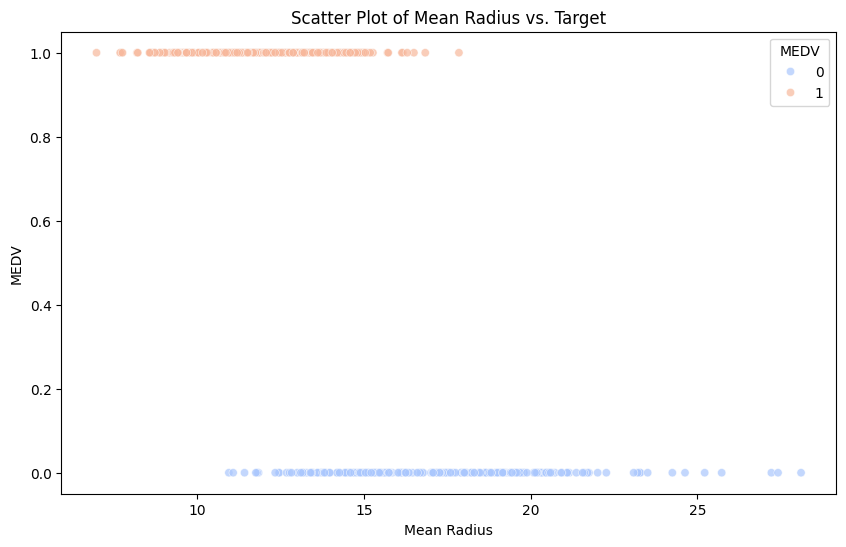

In [33]:
###
###

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
import pandas as pd

plt.figure(figsize=(10, 6))
sns.scatterplot(x=dataset['mean radius'], y=dataset['MEDV'], hue=dataset['MEDV'], palette='coolwarm', alpha=0.7)
plt.title('Scatter Plot of Mean Radius vs. Target')
plt.xlabel('Mean Radius')
plt.ylabel('MEDV')
plt.show()
###

#### The 'MEDV' variable is binary (0 for malignant and 1 for benign), which results in all points being plotted in a horizontal line at y=0 or y=1. To create a more meaningful scatter plot, we should plot two continuous features against each other. Below is the example with 'mean radius' and 'mean texture' for the scatter plot.

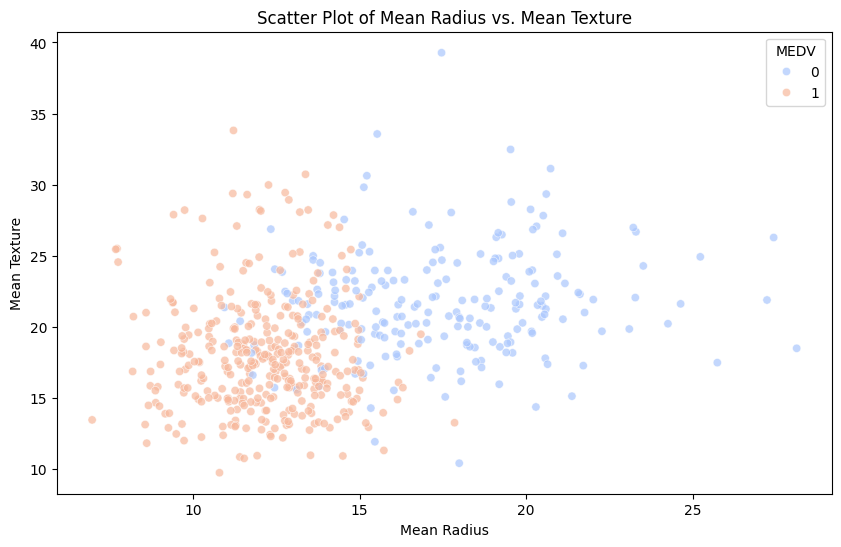

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
import pandas as pd

plt.figure(figsize=(10, 6))
sns.scatterplot(x=dataset['mean radius'], y=dataset['mean texture'], hue=dataset['MEDV'], palette='coolwarm', alpha=0.7)
plt.title('Scatter Plot of Mean Radius vs. Mean Texture')
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.show()

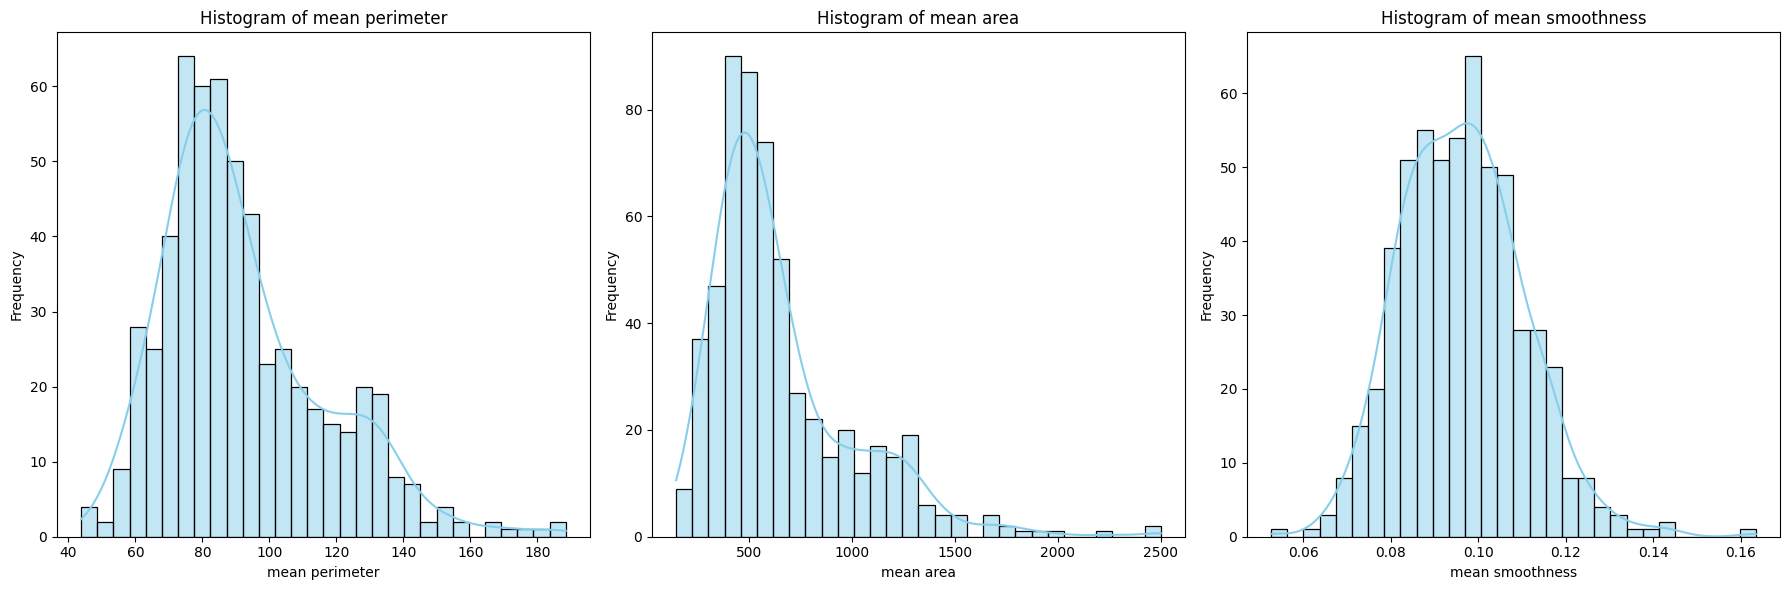

In [14]:
# Histograms for three features: 'mean perimeter', 'mean area', 'mean smoothness'
features = ['mean perimeter', 'mean area', 'mean smoothness']

plt.figure(figsize=(18, 6))
for i, feature in enumerate(features):
    plt.subplot(1, 3, i + 1)
    sns.histplot(dataset[feature], kde=True, color='skyblue', bins=30)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Question 1 (0.5pt)
------

#### Which kind of machine learning problem we have? Explain based on the analysis of the dataset, and how you describe the dataset in terms of achieving the proposed goal? (max number of characters is 300!)

Este é um problema de classificação binária, em que o objetivo é prever se um tumor é Maligno ou Benígno baseado em 30 atributos numéricos do tal tumor. O dataset contém exemplos de tumores já diagnosticados e os seus 30 atributos preenchidos, habilitando o treinamento de um modelo de machine learning que classifique com precisão novos tumores, por meio de dados desconhecidos pelo modelo.

Step 3 (0.5pt)
------

Decide if you want to normalize training choosing True/False.

### In the cell below replace as you think is the best option:
#### 1. `&lt;normalizetraining&gt;` with `'True' or 'False'`
#### and then __run the code__.&lt;/normalizetraining&gt;

In [10]:
###
# REPLACE <normalizeTraining> with 'True' or 'False'
###
normalize_train=True

## Opta-se por proceder à normalização dos dados visto que cada feature do dataset possui valores em variadas escalas. A normalização coloca todas as features em uma escala similar, o que é especialmente importante
# para algoritmos de machine learning que calculam distâncias ou gradientes, como redes neurais. Isso ajuda a melhorar a performance e a estabilidade do modelo durante o treinamento.

Step 4 (0.5pt)
------

Identify the column to remove in X/features and the column to have exclusively in y/target

### In the cell below replace as you think is the best option:
#### 1. Replace `<column_name>` with the name column
#### Take note of the variables names you are creating in train_test_split function for Step 7 and 8
#### and then __run the code__.&lt;/column_name&gt;

In [66]:
from sklearn.model_selection import train_test_split
X = dataset.loc[:, dataset.columns != 'MEDV']
y = dataset.loc[:, dataset.columns == 'MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

####  __run the code__.

In [67]:
# Normalize train only
if normalize_train==True:
    mean = X_train.mean(axis=0)
    std = X_train.std(axis=0)
    X_train = (X_train - mean) / std
    X_test = (X_test - mean) / std


## Step 5 (2.5 pts)

In this step you can build the model, having in mind your dataset and your problem type.


Our **first layer** is our **input layer**

Our __second layer__ is our 1st hidden layer 128 nodes

Our __third layer__ is our second hidden layer 64 nodes

Our **final layer** will be the **output layer**

### In the cell below replace: create a dense model in a variable names "model", and a neural network structure in an array names "structure" 

#### on the output layer select to use one of the following activation functions `'relu'` or `'linear'`

#### output the structure array and the model summary

#### and then __run the code__.

In [94]:
### Set a randomisation seed for replicatability.
np.random.seed(6)

model = keras.models.Sequential()
structure = [30, 128, 64, 1]

# Input layer + hidden layer 1
model.add(keras.layers.Dense(units=structure[1], input_dim = structure[0], activation = 'relu'))

# Hidden layer 2
model.add(keras.layers.Dense(units=structure[2], activation = 'relu'))

# Softmax will predict a category and provide a value for how likely this is the correct prediction.
model.add(keras.layers.Dense(units=structure[3], activation = 'sigmoid'))

print("Layer structure:", structure)
print(model.summary())


Layer structure: [30, 128, 64, 1]


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │         3,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,289 (48.00 KB)

 Trainable params: 12,289 (48.00 KB)

 Non-trainable params: 0 (0.00 B)

None


Question 2
------

#### 2.1 What is the meaning of 'Total params' printed in previous cell? (1 pt)

'Total params' é a soma de todos os parâmetros treináveis e não treináveis no modelo.

#### 2.2 What you would expect in terms of performance metrics, training time and total number of parameters if you had a layer structure like this: (1.5 pts)

\[ `<inputnodes>`, 1280, 640, `<outputnotes>` ]

Aumentar a estrutura ao nível dos nós das camadas/layers faz aumentar a complexidade do modelo. Isso permite ganhar uma maior capacidade de representação, o que pode melhorar a performance em problemas complexos, mas há também um custo de maior tempo de treino e um risco maior de overfitting. É importante equilibrar a complexidade do modelo com a quantidade de dados disponíveis e aplicar técnicas de regularização para evitar overfitting.

#### (max number of characters is 300! for 2.1 and 2.2 together)

Step 7 (1 pt)
-------

Next up we'll compile it and see how it runs.

There's a few parameters you can chose that change how the model trains, and end up changing how the model performs.

We will use some standard parameters for now. Feel free to experiment with some different parameters later on.



### In the below COMPILE THE LOSS, select the correct parameters:
#### 1. with one of the following loss: `'categorical_crossentropy'`, `'mse'`, `'binary_crossentropy'`
#### 2. with one of the optimizers: `<addoptimizer>` with `'sgd'`
#### 3. with one of the following metrics: `'accuracy'`, `'mae'`, `'cosine_similarity'`
#### 4. `<addtrainx>` with correct variable name
#### 5. `<addtrainy>` with correct variable name

#### and then __run the code__.

In [95]:
# Let's compile the model

model.compile(loss = 'binary_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

###


Step 7 part 2 (1 pt)
-------

Fit the model with trainX and Trainy

#### 4. Set the value of epochs to 100 and validation_split to 0.05


In [96]:
# Time to fit the model
print('Starting training')

###
###
training_stats = model.fit(X_train, y_train, epochs=100,validation_split=0.05)


Starting training
Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3740 - loss: 0.7502 - val_accuracy: 0.8000 - val_loss: 0.6444
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8332 - loss: 0.6101 - val_accuracy: 0.9500 - val_loss: 0.5622
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9185 - loss: 0.5143 - val_accuracy: 0.9500 - val_loss: 0.4986
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9040 - loss: 0.4669 - val_accuracy: 0.9500 - val_loss: 0.4480
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9381 - loss: 0.4077 - val_accuracy: 0.9500 - val_loss: 0.4065
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9516 - loss: 0.3475 - val_accuracy: 0.9500 - val_loss: 0.3712
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9596 - loss: 0.3093 - val_accuracy: 0.9500 - val_loss: 0.3416
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9450 - loss: 0.3111 - val_ac

#### Lets print the metrics! Run the cell below.

In [97]:
print('Training finished')
print('Training Evaluation: accuracy = %f , loss = %f'
      %(training_stats.history['accuracy'][-1], training_stats.history['loss'][-1]))
print('Validation Evaluation: accuracy = %f , loss = %f'
      %(training_stats.history['val_accuracy'][-1], training_stats.history['val_loss'][-1]))

Training finished
Training Evaluation: accuracy = 0.981481 , loss = 0.056436
Validation Evaluation: accuracy = 0.950000 , loss = 0.138575


#### Lets plot it! Run the cell below.

In [98]:
fig = go.Figure()
fig.add_trace(go.Scattergl(y=training_stats.history['loss'],
                    name='Train'))
fig.add_trace(go.Scattergl(y=training_stats.history['val_loss'],
                    name='Valid'))
fig.update_layout(height=500, width=700,
                  xaxis_title='Epoch',
                  yaxis_title='Loss')
fig.show()

In [99]:
training_stats.history

fig = go.Figure()
fig.add_trace(go.Scattergl(y=training_stats.history['accuracy'], name='accuracy Train'))
fig.add_trace(go.Scattergl(y=training_stats.history['val_accuracy'], name='accuracy Value'))
fig.update_layout(height=500, width=700,
                  xaxis_title='Epoch',
                  yaxis_title='accuracy')
fig.show()


Question 3
------

#### 3.1 Justify your previous choices in Step  (1 pt)

Primeiramente, a função de ativação sigmoid foi utilizada na output layer em vez de 'relu' porque é mais adequada para tarefas de classificação binária, produzindo valores no intervalo [0, 1], que podem ser interpretados diretamente como probabilidades. Esta característica é compatível com a função de binary cross-entropy e permite uma aplicação direta de thresholds para se obter labels de classes, portanto para a função de perda escolhemos a binary cross-entropy porque mede eficazmente a diferença entre as probabilidades previstas e as labels reais, alinhando-se assim com a natureza do nosso problema. Finalmente, para as métricas, escolhemos a accuracy porque é a mais direta e fácil de interpretar dentre as opções dadas, indicando a proporção de previsões corretas em relação ao total de previsões realizadas.

#### 3.3 If you were asked to stop the training after 4 epochs, which regularization technique were you applying? Would this be a good approach for this problem? Why? (1,5 pt)

Estaria a utilizar a técnica de *Early Stopping*. Não seria a melhor forma de lidar com o problema, visto que a função loss diminui a cada epoch, pelo que interromper o treinamento no início faria com que não se atingisse a mínima loss, nem a máxima accuracy. O ealry stopping é mais indicado para casos em que o desempenho no conjunto de validação começa a degradar-se à medida que é treinado, normalmente após um determinado número de epochs em que não se observa qualquer melhoria. Não é o nosso caso.

#### (max number of characters is 300! )

Step 8 (0.25pt)
------

Now that our model is trained and ready, let's see how it performs on our test data!



### In the cell below EVALUATE the model on the test dataset 
#### and then __run the code__.


In [108]:
###
# REPLACE <addTestX>  AND <addTestY> 
###
evaluation = model.evaluate(X_test, y_test, verbose=0)
###

print('Test Set Evaluation: loss = %0.6f, accuracy = %0.2f' %(evaluation[0], evaluation[1]))

Test Set Evaluation: loss = 0.070738, accuracy = 0.98


Question 4
------

#### 4.1 Why is important to test the model on test dataset? (0.5 pts)

Os dados de teste oferecem uma avaliação independente e imparcial da performance do modelo, fornecendo uma medida objetiva de quão bem o modelo generaliza para novos dados que não foram vistos durante o treinamento. Isto ajuda a verificar se o modelo aprendeu padrões úteis que se aplicam além dos dados de treinamento, algo crucial para garantir que o modelo não esteja apenas a memorizar os exemplos de treinamento (overfitting)

#### 4.2 Please correlate the results with the problem and write 1 or 2 setences about it (0.5 pts)

Os resultados obtidos sugerem que o modelo generaliza eficazmente para dados não vistos, alcançando uma elevada precisão (98%) ao prever corretamente as labels de classe para a maioria das instâncias nos dados teste. O bom desempenho indica que o modelo é robusto e capaz de realizar previsões fiáveis, o que é crucial para a sua aplicação prática em cenários do mundo real.

#### (max number of characters is 300!)

Part 2 - CNN Training
=======

Total Points: 10

Problem Description:

We will train a CNN to recognise cats and dogs. The train folder archive 200 images of cats and 200 images of dogs. Train your algorithm on these files and predict the labels for test (1 = dog, 0 = cat). The test folder has images of cats and dogs.

#### Run the code below to import our required libraries 

In [2]:
import numpy as np
import pandas as pd 
from tensorflow.keras.utils import load_img, to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os



### Run the cell below:

In [15]:
filenames = os.listdir("datasets/train")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})
df.head()

filename  category
0    cat.6.jpg         0
1  cat.198.jpg         0
2  dog.167.jpg         1
3  dog.173.jpg         1
4   dog.36.jpg         1


### Run the cell below:

<Axes: xlabel='category'>

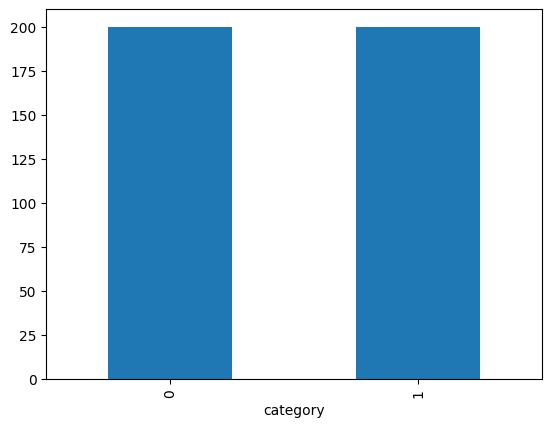

In [16]:
df['category'].value_counts().plot.bar()


### Run the cell below to see some of the images within the train dataset:

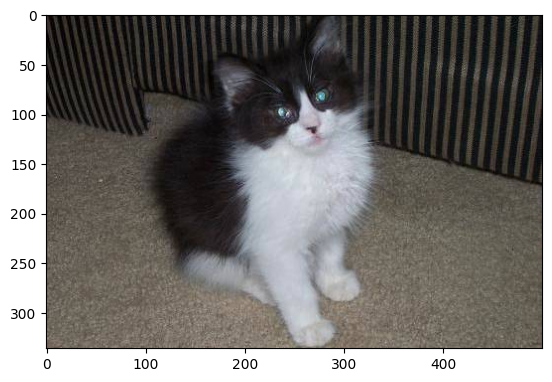

In [25]:
#run several times to choose a random picture
sample = random.choice(filenames)
image = load_img("datasets/train/"+sample)
plt.imshow(image)

Step 1 (0.5pt)
------
Seeing the images from the previous plot, choose the following parameters with integers

### In the cell below replace as you think is the best option:
#### 1. `<IMAGE_WIDTH>`
#### 2. `<IMAGE_HEIGHT>`
#### 3. `<IMAGE_CHANNELS>` 
#### and then __run the code__.

In [28]:
import os
from tensorflow.keras.utils import load_img, img_to_array

train_dir = "datasets/train"
filenames = os.listdir(train_dir)

max_height = 0
max_width = 0

for filename in filenames:
    image = load_img(os.path.join(train_dir, filename))
    image_array = img_to_array(image)
    height, width = image_array.shape[:2]
    if height > max_height:
        max_height = height
    if width > max_width:
        max_width = width

print(f"Maximum height: {max_height}")
print(f"Maximum width: {max_width}")


Maximum height: 500
Maximum width: 500


In [29]:
IMAGE_WIDTH=500
IMAGE_HEIGHT=500
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3 #RGB images

Step 2 (1pt)
------

Decide if you want to normalize training choosing True/False.

### In the cell below replace as you think is the best option:
#### 1. `<shape0>, <shape1>, <shape3>` with integers as the shape of each input image
#### 2. `<OUTPUT_DIM>` with integer corresponding to the output dimension
#### 3. `<loss>` with string corresponding to the loss function
#### 4. `<metrics>` with string corresponding to the metric used in this problem
#### and then __run the code__.

In [86]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()


#BLOCK A: LINE 7-10
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(500, 500, 3))) #shapes 0 and 1 are the images' dimensions
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
#BLOCK B: LINE 12-15
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
#BLOCK C: LINE 17-20
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
#BLOCK D: LINE 22-26
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) #output_dim is 2 as the output will be either 0 or 1

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 498, 498, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 498, 498, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 249, 249, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 249, 249, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 247, 247, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 247, 247, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 123, 123, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 123, 123, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 121, 121, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 121, 121, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 60, 60, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 60, 60, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 460800)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │   235,930,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 236,027,330 (900.37 MB)

 Trainable params: 236,025,858 (900.37 MB)

 Non-trainable params: 1,472 (5.75 KB)

Step 3
------


### Answer to the following question:
#### 1. Which blocks correspond to the feature mapping part of the CNN? What is feature mapping doing? (1pt)


Blocos A, B e C. O processo de feature mapping envolve o uso de convolutional e pooling layers para detetar as features mais importantes das imagens de inputs. 

#### 2. Which blocks correspond to the classifcation part of the CNN? What is the classifcation part doing? (1pt)


O bloco D corresponde à parte de classificação da CNN. A parte de classificação é responsável por pegar nas características detetadas pelos blocos de featuring mapping (A, B e C) e utilizá-las para fazer previsões sobre a imagem de input.

#### 3. Which operation is happening in MaxPooling2D? (1pt)

A operação MaxPooling2D efectua uma redução dimensional no mapeamento das features de input por meio da seleção do valor máximo dentro de uma janela específica (normalmente 2x2), percorendo toda a imagem de input. Isto ajuda a acelerar o tempo de treino e torna as características detetadas mais robustas. As camadas de pooling reduzem, portanto, a amostragem dos dados.


### Run the cell below:

In [87]:
earlystop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
callbacks = [earlystop, learning_rate_reduction]
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'}) 
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)


### Run the cells below:

<Axes: xlabel='category'>

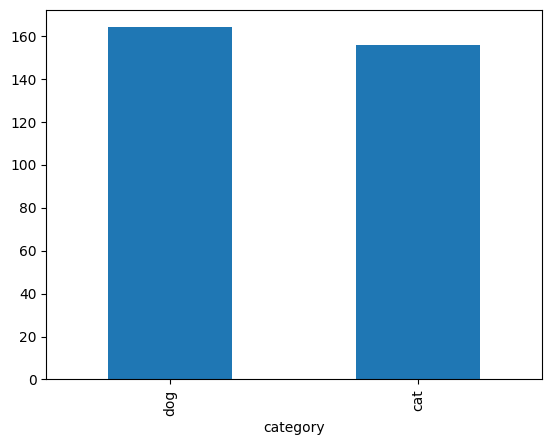

In [88]:
#train dataset size
train_df['category'].value_counts().plot.bar()

<Axes: xlabel='category'>

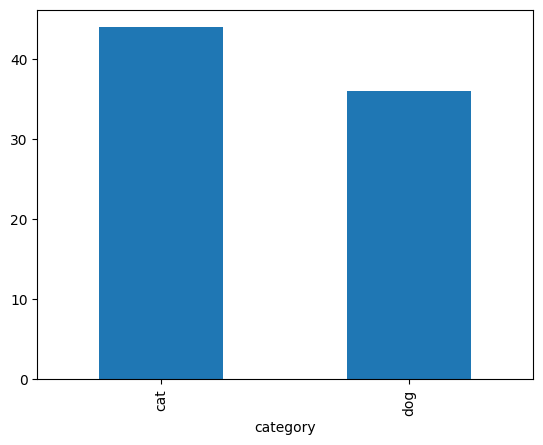

In [89]:
#validate dataset size
validate_df['category'].value_counts().plot.bar()

In [90]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

Step 4 (1pt)
------

The next cell is doing some data augmentation. This topic was related with the theoretical classes, but not explicitly explained. 
Replace by the value that makes sense in 1, and answer the question in step 4.
To check what each parameter is doing you can try several values and run the cell on Step 4 to see its effect. (might help to answer in 4)

### In the cell below replace as you think is the best option:
#### 1. `<rescale_size>` with the integer representing the maximum value within the images pixel values

#### Try out the different rotation_range, zoom_range and horizontal_flip parameters to help answering the next question

#### and then __run the code__.

In [91]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
    rotation_range=30,
    rescale=1./255, #RGB Images' values range from 0 to 255
    shear_range=0.1,
    zoom_range=0.5,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

### Run the cell below:

In [92]:
train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "datasets/train", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "datasets/train", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "datasets/train", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 320 validated image filenames belonging to 2 classes.
Found 80 validated image filenames belonging to 2 classes.
Found 1 validated image filenames belonging to 1 classes.


Step 5 
------

Change the values on Step 4 and run the cell bellow after, to see the parameters' effect.
Answer the question after.


#### and then __run the code__.

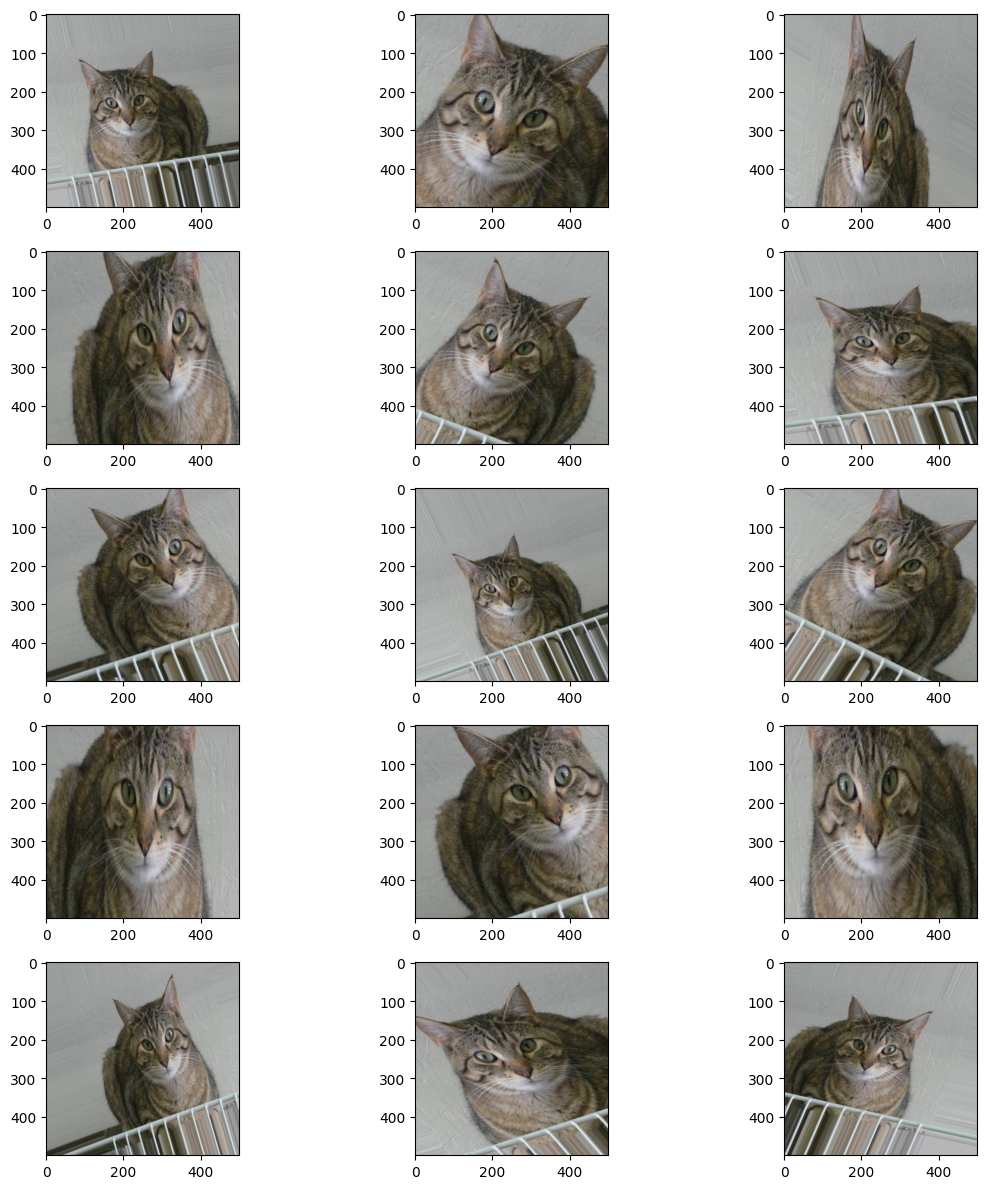

In [93]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

Step 5 (1pt)
------


### Answer to the following question:
#### 1.What is the objective of data augmentation done in Step 4 and ploted in Step 5? 

Data augmentation é uma técnica utilizada para expandir artificialmente o tamanho de um dataset de treino, criando versões modificadas de imagens no conjunto de dados. O objetivo é aumentar a capacidade de generalização de um modelo, melhorando assim o seu desempenho em dados não vistos. 

### Run the cell below to train (might take arround 7 minutes):

In [95]:
history = model.fit(
    train_generator, 
    epochs=3,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)
model.save_weights("model.weights.h5")

Epoch 1/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 655s 32s/step - accuracy: 0.5874 - loss: 0.9081 - val_accuracy: 0.5467 - val_loss: 5.7696 - learning_rate: 0.0010
Epoch 2/3
 1/21 ━━━━━━━━━━━━━━━━━━━━ 3:30 11s/step - accuracy: 0.6667 - loss: 0.8690

2024-06-19 21:38:15.641129: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


21/21 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.6667 - loss: 0.8690 - val_accuracy: 0.6000 - val_loss: 5.8397 - learning_rate: 0.0010
Epoch 3/3


2024-06-19 21:38:15.992086: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


21/21 ━━━━━━━━━━━━━━━━━━━━ 382s 18s/step - accuracy: 0.5998 - loss: 0.8061 - val_accuracy: 0.5333 - val_loss: 1.6164 - learning_rate: 0.0010


Step 6 (1.5pt)
------


### Answer to the following question:
#### 1.What is the definition of epoch, batch size and training dataset size? 

*1. Epoch:* refere-se a uma passagem completa de todo o dataset pela rede neuronal durante o treino. Durante uma epoch, o modelo processa todos os exemplos de treino uma vez, calcula a perda (loss) e atualiza os parâmetros do modelo (weights e bias) com base no algoritmo de otimização (por exemplo, gradient descent).
*2. Batch size*: refere-se ao número de exemplos de treino utilizados numa iteração (passagem para a frente e para trás) da rede neural. Os batchs melhoram a eficiência do treino ao reduzirem a memória necessária para executá-lo em comparação ao processamento do dataset de treino inteiro de uma só vez.
*3. Training dataset:* representa o número total de exemplos disponíveis para treinar o modelo. A dimensão do dataset de treino influencia diretamente a capacidade do modelo para generalizar e aprender padrões. Um conjunto de dados maior pode ajudar a mitigar o overfitting e melhorar o desempenho do modelo em dados não vistos.

### Run the cells below:

In [102]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_gen = ImageDataGenerator(rescale=1./255)

filenames = os.listdir("datasets/test")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

test_df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

test_df["category"] = test_df["category"].replace({0: 'cat', 1: 'dog'}) 
test_df = test_df.reset_index(drop=True)


nb_samples = test_df.shape[0]
example_generator = test_gen.flow_from_dataframe(
    test_df, 
    "datasets/test", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=32
)

Found 200 validated image filenames belonging to 2 classes.


In [112]:
predict = model.predict(example_generator, steps=int(np.ceil(nb_samples/batch_size)))

14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 498ms/step


2024-06-19 22:17:44.988068: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


In [108]:
predict = model.predict(example_generator, steps=int(np.ceil(nb_samples/batch_size)))
test_df['category_predicted'] = np.argmax(predict, axis=-1)
test_df["category_predicted"] = test_df["category_predicted"].replace({0: 'cat', 1: 'dog'}) 


14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 418ms/step


2024-06-19 21:52:42.354742: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


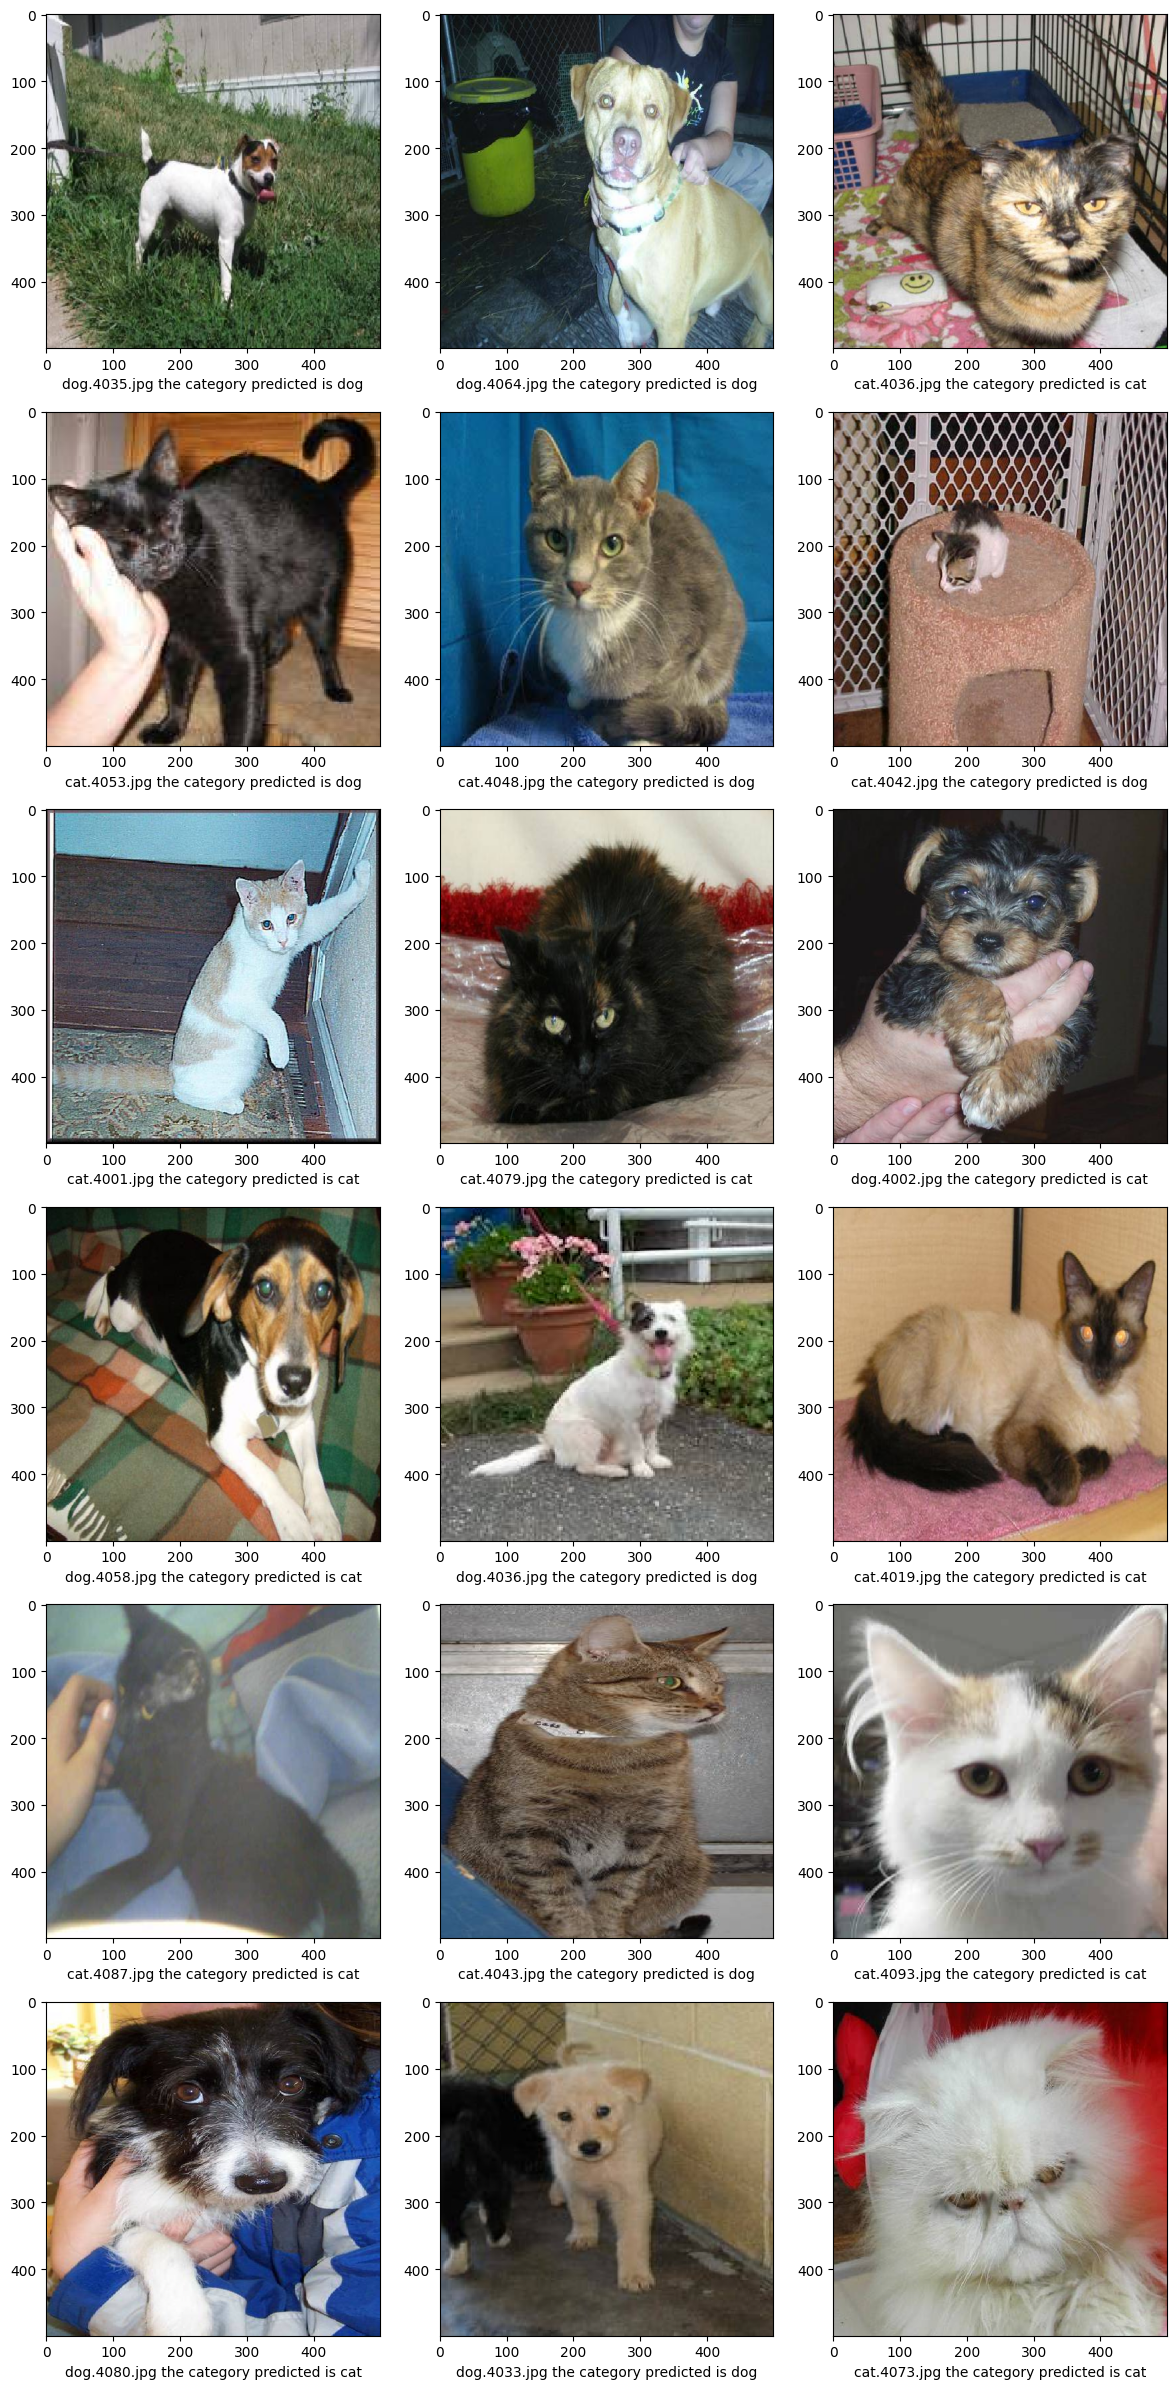

In [110]:
sample_test = test_df.sample(n=18)
sample_test.head()
plt.figure(figsize=(12, 24))
i = 0
for index, row in sample_test.iterrows():
    i = i+1
    filename = row['filename']
    category = row['category_predicted']
    img = load_img("datasets/test/"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, i)
    plt.imshow(img)
    plt.xlabel(filename + ' the category predicted is ' + "{}".format(category) + '' )
plt.tight_layout()
plt.show()

Step 7 (2pt)
------


### Answer to the following question:
#### 1. How is the model performing? Find out the accuracy.
#### Find 2 reasons that might justify the model's performance

In [113]:
from sklearn.metrics import accuracy_score

predictions = model.predict(example_generator, steps=int(np.ceil(nb_samples / batch_size)))

# Post-processing of predictions (assuming binary classification)
predicted_labels = np.argmax(predictions, axis=-1)  # Get predicted labels (0 or 1)

# Get true labels from example_generator
true_labels = example_generator.classes

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy: {accuracy}")


14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 494ms/step
Accuracy: 0.555


2024-06-19 22:19:46.414622: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Baseando-se nos logs de treino no Step 5 e na accuracy calculada acima, observa-se que a maior accuracy alcaçada foi de 60%, na Epoch 2. Isto indica uma performance moderada, com uma accuracy a variar entre aproximadamente 53% e 60% no dataset de teste. 

Existem duas possíveis razões para justificar tal performance, sendo a primeira relacionada à quantidade e à qualidade dos dados. Se o dataset for pequeno ou não for suficientemente diversificado, o modelo pode ter dificuldade em generalizar bem para os dados de teste (não vistos) - o que pode levar a flutuações na precisão entre epochs - à medida que o modelo aprende diferentes padrões nos dados. 

Por fim, destacam-se a complexidade do modelo e os parâmetros de treino. A complexidade da arquitetura do modelo e os hiperparâmetros como learning rate, batch size e dropout rates também podem ter um impacto significativo no desempenho do treino. Parâmetros mal escolhidos ou modelos demasiado complexos podem levar tanto a um overfitting quanto a um underfitting.